# Credit-Score-Classification

- Projeto de classificação de clientes de acordo com seus dados pessoais e financeiros. Dataset disponível em https://www.kaggle.com/laotse/credit-risk-dataset.
- GitHub : https://github.com/Ewertonv90/Credit-Score-Classification



# EN

Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

# PT-BR

Declaração do problema
Você está trabalhando como cientista de dados em uma empresa financeira global. Ao longo dos anos, a empresa coletou dados bancários básicos e reuniu muitas informações relacionadas a crédito. A gerência quer construir um sistema inteligente para segregar as pessoas em faixas de pontuação de crédito para reduzir os esforços manuais.

Tarefa
Dadas as informações relacionadas ao crédito de uma pessoa, construa um modelo de aprendizado de máquina que possa classificar a pontuação de crédito.

# Data dictonary

 

- person_age             =     Age
- person_income	          =  Annual Income
- personhomeownership	   =     Home ownership
- personemplength	        =    Employment length (in years)
- loan_intent	             =   Loan intent
- loan_grade	           =     Loan grade
- loan_amnt	              =  Loan amount
- loanintrate	          =      Interest rate
- loan_status	          =      Loan status (0 is non default 1 is default)
- loanpercentincome	     =   Percent income
- cbpersondefaultonfile	  =  Historical default
- cbpresoncredhistlength	=    Credit history length

# 1.1 Data Undestanding

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [30]:
df = pd.read_csv('C:/Users/ewert/Desktop/Credit-Score-Classification/raw dataset/credit_risk_dataset.csv')


In [31]:
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- Média salaria de $ 6.607 dolares anuais
- Esses salarios variam 6.1983 dolares anuais para mais ou para menos.
- Como se é esperado, quanto maior a idade, maior o salário.

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [33]:
df.shape

(32581, 12)

# EDA 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

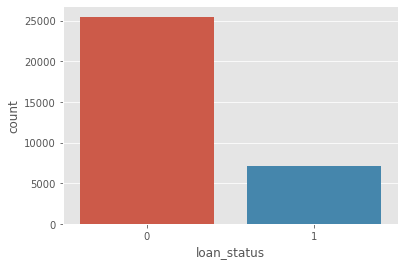

In [38]:
np.unique(df['loan_status'], return_counts=True)
sns.countplot(x = df['loan_status'])


- O target Loan Status é o nosso alvo pra determinar o risco de crédito, caso seja 0 o valor, o emprestimo está em dia, caso seja 1, o cliente não pagou a dívida. Préviamente, 25473 clientes da base de dados pagaram suas dívidas, e 7108 estão em atraso. Isso representa cerca de 78,18% de pessoas em dia e 21,82% possuem dívidas em atraso, somando o total de 32581 registros de clientes. 

(array([2.693e+04, 4.891e+03, 6.510e+02, 8.900e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

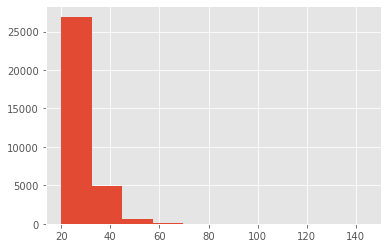

In [54]:
plt.hist(x=df['person_age'])

- A maioria dos clientes tem entre 20 e 42 anos

person_home_ownership
MORTGAGE    13444
OTHER         107
OWN          2584
RENT        16446
Name: person_home_ownership, dtype: int64

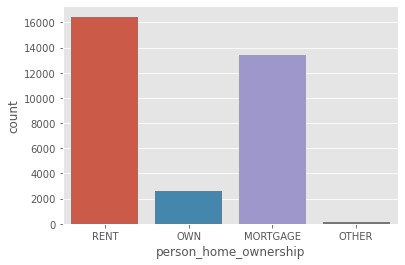

In [69]:
sns.countplot(x = df['person_home_ownership'])
df['person_home_ownership'].groupby(df['person_home_ownership']) .count()

- 41,26% dos clientes moram em imóveis hipotecados.
- 50,48% dos  clientes moram em imóveis alugados.
- 7,94% dos clients tem casa própria quitada.
- 0,32% dos clientes tem imóveis em situações diversas, diferentes das principais citadas acima.